# Bank Churn Analysis

## Libraries and importing dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Read in the data
1.check the dimensions of dataset

2.fetching and attributes name and know what their meaning

3.generate info of the whole data

4.missing detection

5.duplicated detection

6.descriptive statisical analysis on categorical columns

In [4]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Here are some interpretion in some columns

CreditScore: It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.

geography: customer geography distribution

tenure: the number of years the customer has been associated with the bank

NumOfProducts:  It can include various offerings such as savings accounts, loans, credit cards, etc.

HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.

IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.

EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.

Exited: It indicates whether a customer has churned (1) or not (0) from the bank.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


10000 records in the dataset and non-null records.
10 numerical and 3 categorical

In [7]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


None missing value in this dataset

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


no duplicate records

In [9]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


I think Surename has not relationship with the customer churned or not. Unless their name has magic. So I will drop it.

## Data Wrangling
1.dropping insignificant columns
2.Rename some columns for better using 

In [10]:
df.drop(columns=["RowNumber","CustomerId", "Surname"],inplace=True)

In [11]:
df.rename(columns={"Exited":"Churned"},inplace=True)
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


## Explorative Data Analysis

### Visualize

#### Catogorical

1.Draw the distribution of customer churned

2.Customer Churned by Geography

3.Customer churned by Gender	

4.Customer churned by tenure

5.Customer churned by NumOfProducts

6.Customer churned by HasCrCard

7.Customer churned by IsActiveMember

#### Numerical

1.CreditScore

2.age

3.Balance

4.Estimated Salary


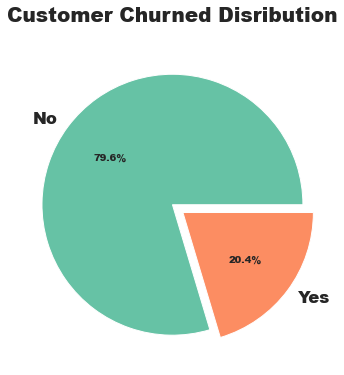

In [12]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

### Inference
Imbalance in class imbalanced
We can use the over-sampling technique from SMOTE

In [13]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

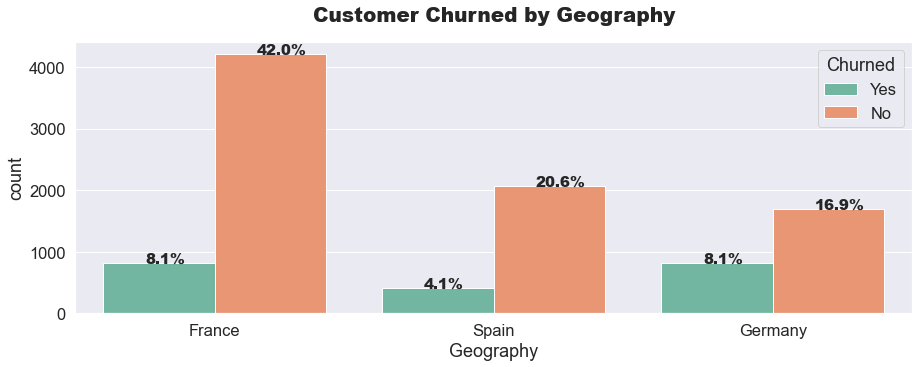

In [14]:
countplot('Geography')

50% of customer comes from France, Spain is the second, Germany is the least.

The ratio of churned and not churned in France is nearly 1:5, similar to that in Spain. However, in Germany is 1:2. 

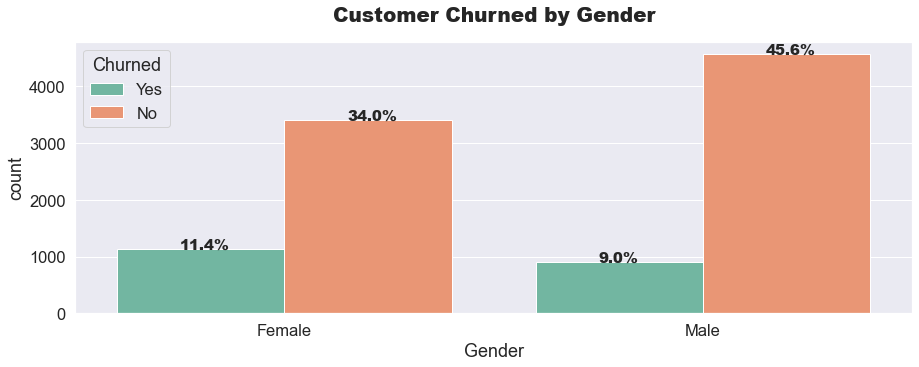

In [15]:
countplot("Gender")

Female customer is more likely to be churned.

Female customer is less than male for nearly 8%.

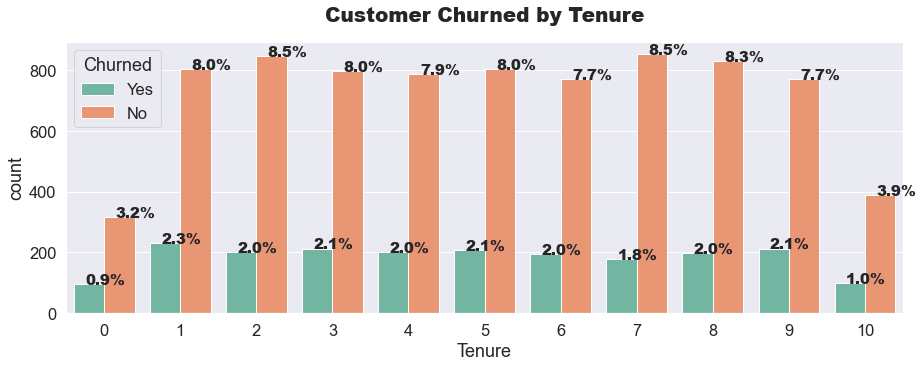

In [16]:
countplot("Tenure")

I think the distribution is similar except 10 or 0, so it is hard to make inference.

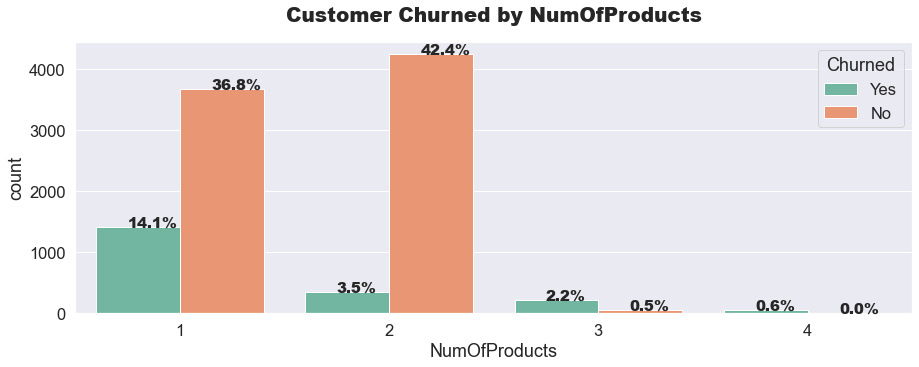

In [17]:
countplot("NumOfProducts")

1.Customer mostly buy 1 or 2 products of the bank

2.A very small churned rate in customers who buy 2 products compared to the not churned rate.

3.Very less people buy more than 2 products

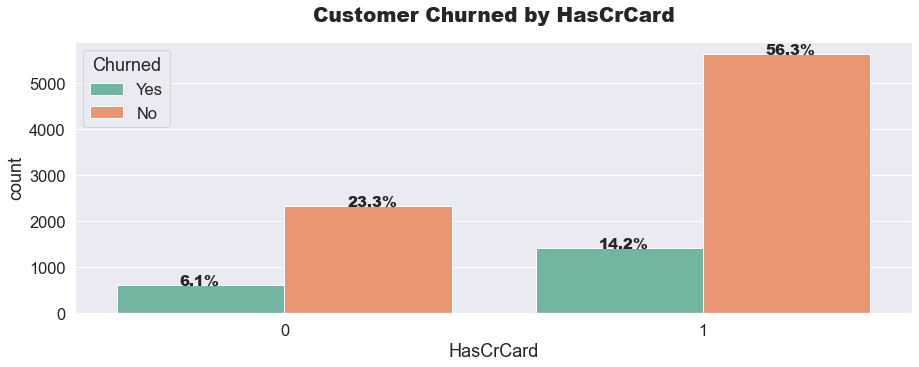

In [18]:
countplot("HasCrCard")

The ratio between them is 1:4 both.

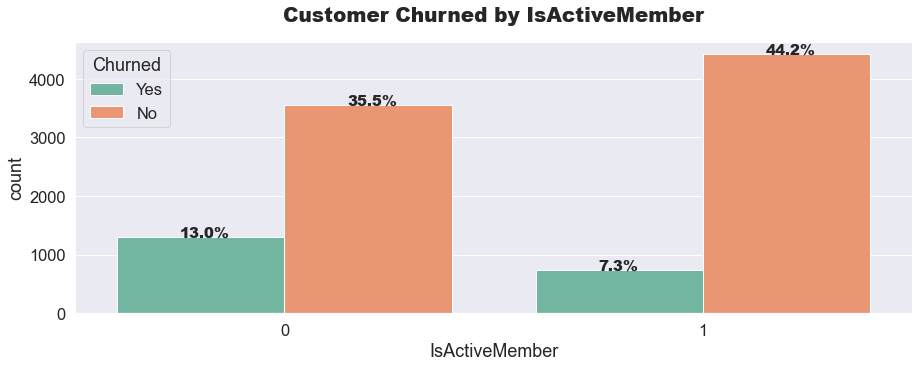

In [19]:
countplot("IsActiveMember")

Active member has a lower churned rate

In [20]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(data=df, x="Churned", y=df[column],palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

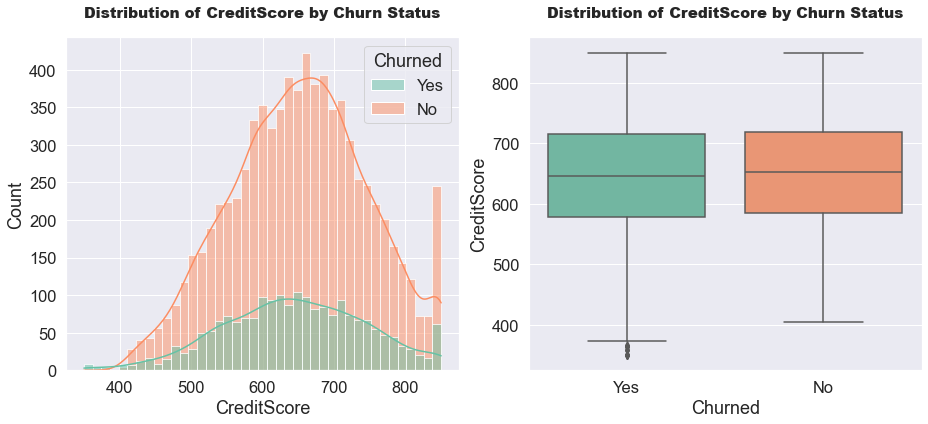

In [21]:
continous_plot("CreditScore")

They are similar in distribution and median

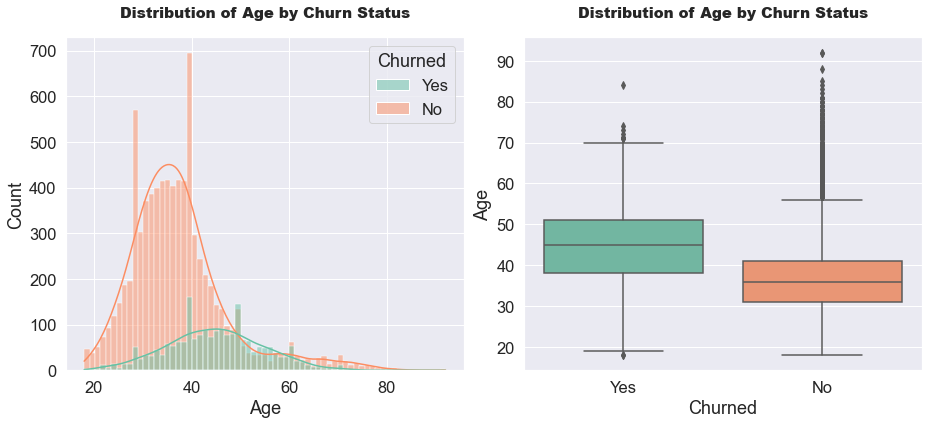

In [22]:
continous_plot("Age")

Among the the age groups over 50, there is a really high churned rate.

The distribution is right-skewed, we can apply log function on it to make it more normal

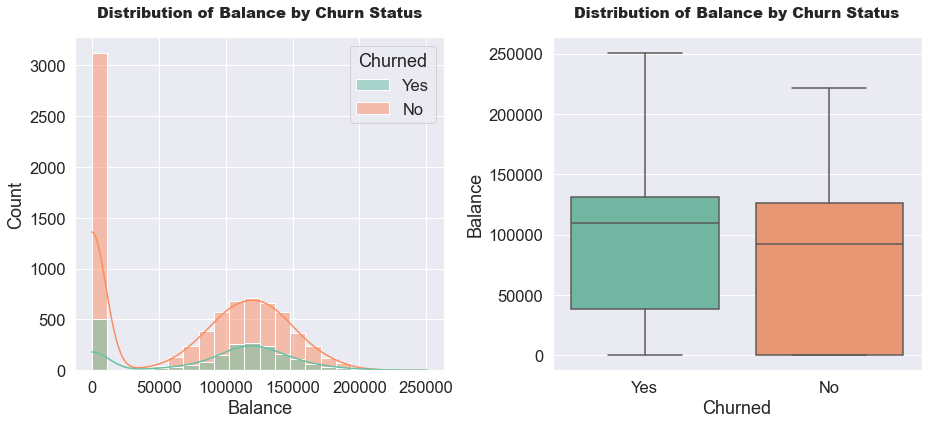

In [23]:
continous_plot("Balance")

More than 3000 people have balance, and it has a higher churned rate in the 0 balance account.

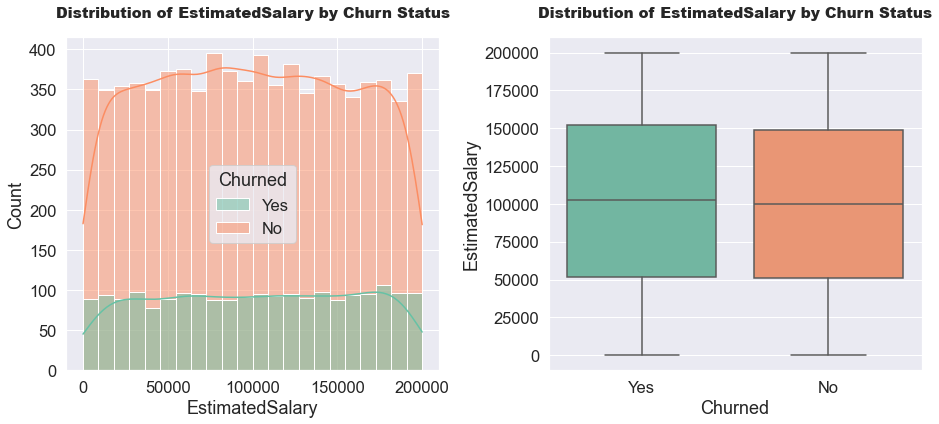

In [24]:
continous_plot("EstimatedSalary")

The distribution seems similar, so we can not make inference now.

## Feature Engineering

1.Redesign features in NumOfProducts, we can see that in the countplot of NumOfProducts there are very few customer buying more than two products in the bank, so we can integrate all the porducts more than 2 as a new feature to make our model more accurate. Besides, by redesigning it is good for us to use the feature for action to seek the potential churned customer.

In [25]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

df["Total_Products"] = np.select(conditions,values)

df.drop(columns="NumOfProducts", inplace=True)

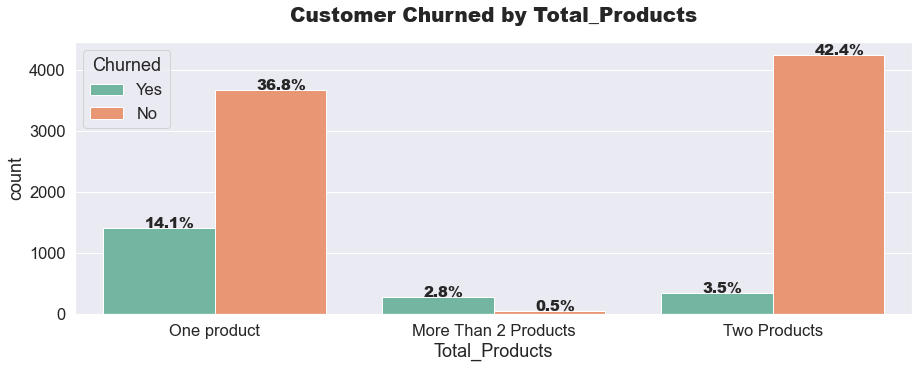

In [26]:
countplot("Total_Products")

## Data Preprocessing

1. Performing One-hot encoding in categorical variable

2. Encoding Target Variable

3. Checking skewness for continuous variable and apply log if skewness outweigh abs(1)

4. Segregating Features & Labels for Model Training.

5. Splitting Data For Model Training & Testing

6. Applying SMOTE to Overcome the Class-Imbalance in Target Variable.¶

In [27]:
cat_cols = ["Geography","Gender","Total_Products"]

df = pd.get_dummies(columns=cat_cols, data=df)

In [28]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products
0,619,42,2,0.00,1,1,101348.88,1,True,False,False,True,False,False,True,False
1,608,41,1,83807.86,0,1,112542.58,0,False,False,True,True,False,False,True,False
2,502,42,8,159660.80,1,0,113931.57,1,True,False,False,True,False,True,False,False
3,699,39,1,0.00,0,0,93826.63,0,True,False,False,True,False,False,False,True
4,850,43,2,125510.82,1,1,79084.10,0,False,False,True,True,False,False,True,False


In [30]:
cols = ["CreditScore","Age","EstimatedSalary"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


Age is highly right skewed, so we applied log in Age.

In [31]:
old_age = df["Age"]
df["Age"] = np.log(df["Age"])

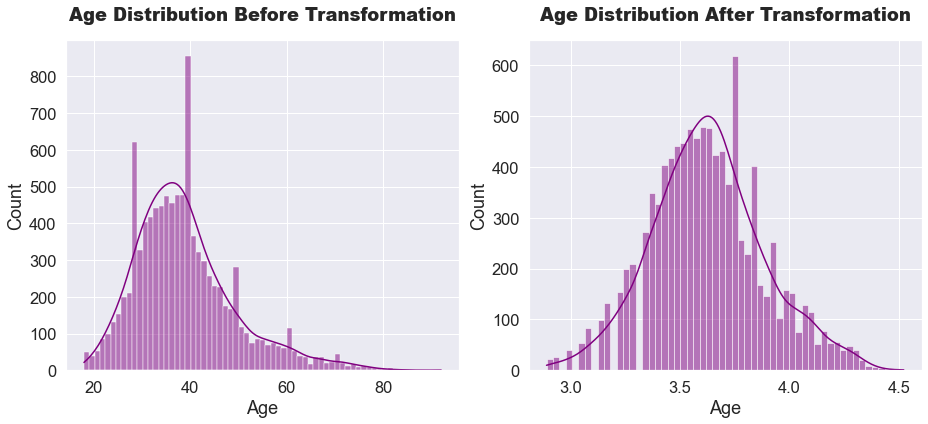

In [32]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

In [33]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 15)
Shape of x_test is:  (2000, 15)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [34]:
smt = SMOTE(random_state=42)
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)
print(x_train_resampled.shape ,y_train_resampled.shape)
y_train_resampled.value_counts().to_frame()

(12736, 15) (12736,)


,count
Churned,
0,6368
1,6368


## Model using RandomForest


In [35]:
rfc = RandomForestClassifier()

param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100]})

In [36]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

Best Parameters for RandomForest Model is:




{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

In [37]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=6)

In [38]:
y_train_pred = rfc.predict(x_train_resampled)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.64 %
Accuracy Score of Model on Testing Data  is => 84.25 %


In [52]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8425
Recall Score of the Model is => 0.6518518518518519
Precision Score of the Model is => 0.8425


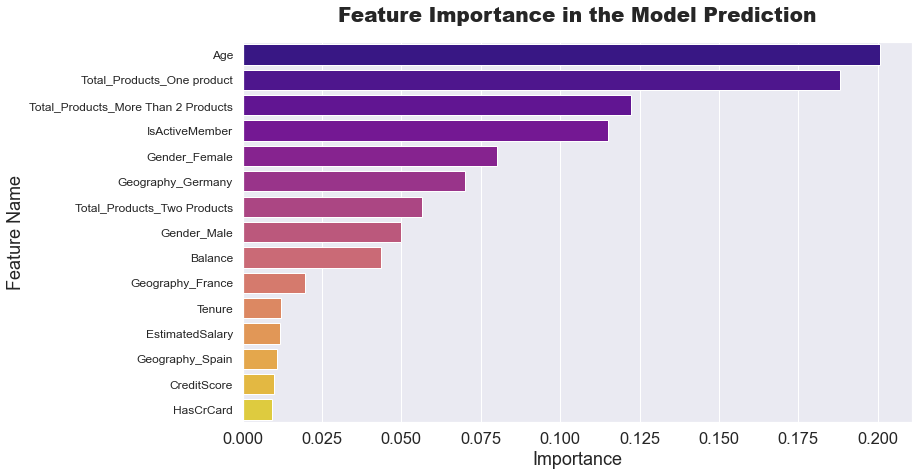

In [40]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

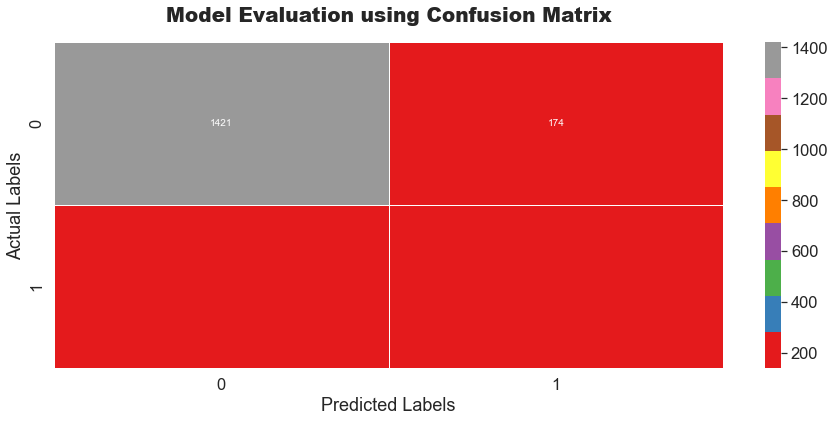

In [49]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

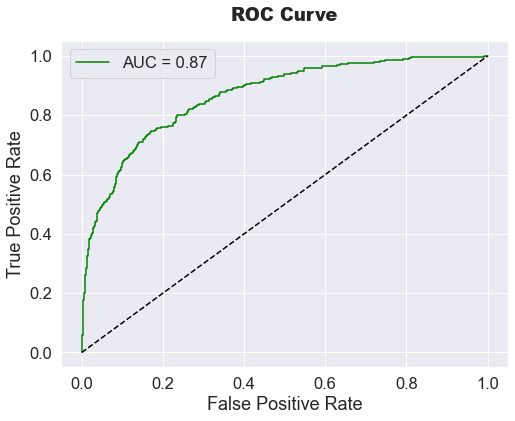

In [50]:
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

## CONCLUSION

The accuracy of model in testing data is 84.25%. 

The feature importance shows us we need to pay attention to age, OneProduct, More than 2 product, isactivemember, Germany, female.

Combined the EDA before, 

1.the bank should focus more on the people aged 40, it has a higher rate seem in the chart. Suggestion is communicate with them more and get their feedback with some reward to them.

2.People buying 2 products is less likely to be churned, the bank should figure out which 2 products the customer buy most and persuade customer buying these 2. And for those bought more than 2, the bank should find out which product make the churn rate so high to improve the phenomenom.

3.The bank should hold more activities to the member of their bank, which makes their customer activated.

4.For the bank facilities in Germany, they need to learn from those in France.

5.The bank should investigate more on Female customer, design more activities and rewards(like shopping coupons) for female customer.